## Exploring Top2Vec on Recipe Topic Generation

Guide here: https://github.com/ddangelov/Top2Vec

#### Notes:
When running Top2Vec with Doc2Vec on the unmodified (only the initial quote and bracket removed from directions; both reformatted into a list of strings) directions and ingredients columns the topics returned were somewhat messy with words like recipe and ingredient sprinkled throughout.

BERT returned far fewer topics on both columns.

Using the "clean" and preprocessed columns, BERT only returned two topics for the ingredients list.

The clean and preprocessed directions column was found to contain nan for some (31 total out of 22k) recipes where the directions were short such as "Mix all the ingredients." and all words were removed during cleaning. There was one instance that numbers were the only characters present for both ingredients and directions. These were removed before running the topic generation model when the column of interest was impacted.

In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small_heroclean.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'ingredients', 'directions',
       'link', 'source', 'NER', 'clean_ingredients', 'clean_directions',
       'clean_ingredients_spice_r', 'clean_directions_spice_r'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [5]:
df.head()

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions,clean_ingredients_spice_r,clean_directions_spice_r
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...,bring cream cheese room temperature mix marshm...,jar marshmallow creme cream cheese philadel...,bring cream cheese temperature mix marshmallo...
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...,place potato large saucepan cover cold water s...,russet yukon gold potato fat milk rice ...,place potato saucepan cold rinse away star...
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...,loaf bread small piece place piece greased x x...,loaf frozen bread dough firmly brown sugar...,loaf bread place greased combine brow...
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...,preheat oven f spray muffin tin spray like pa...,cream egg pork sausage,preheat oven f muffin tin pam bundt mu...
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...,brown ground beef onion fat boil heat simmer ...,beef onion pinto kidney bean l lim...,brown beef onion fat remaining bring boil ...


In [8]:
documents = [x[2:-2] for x in df['directions'] if type(x)==str]

In [9]:
documents

['Bring cream cheese to room temperature. Mix Marshmallow Creme and Philadelphia cream cheese together. Store in refrigerator. Serve with fresh sliced apples.',
 'Place potatoes in large saucepan, cover with cold water, then drain to rinse away some starch.", "Cover with fresh cold water, bring to a boil over medium heat, and boil 20 minutes, or until potatoes are tender and beginning to fall apart.", "Warm milk, butter, and wasabi paste in small saucepan over medium-low heat until butter is melted.", "Whisk to combine.", "Drain potatoes, and return to saucepan.", "Beat on low speed with electric mixer to break up.", "With electric mixer running, beat in milk mixture until potatoes are smooth and light.", "Season with salt, if desired.", "Serve garnished with green onions (if using).',
 'Cut 1 loaf of bread into small pieces; place pieces in a greased 13 x 9 x 2-inch baking dish.", "Combine brown sugar, pudding mix and milk; mix well.", "Drizzle half of brown sugar mix over the dough p

In [10]:
model = Top2Vec(documents,ngram_vocab=True,speed='deep-learn')

#embedding_model='all-MiniLM-L6-v2'

2022-06-18 14:35:10,120 - top2vec - INFO - Pre-processing documents for training
2022-06-18 14:35:13,794 - top2vec - INFO - Creating joint document/word embedding
2022-06-18 14:49:03,175 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-06-18 14:49:18,848 - top2vec - INFO - Finding dense areas of documents
2022-06-18 14:49:20,937 - top2vec - INFO - Finding topics


In [11]:
model.get_num_topics()

216

In [12]:
model.get_topics()

(array([['bare simmer', 'boil reduce', 'reduce heat', ...,
         'dissolve bouillon', 'continue cooking', 'has melted'],
        ['salad dressing', 'tossed salad', 'salad greens', ...,
         'mayonnaise', 'chilled chinese', 'green onions'],
        ['dissolve jello', 'jello', 'dissolve jell', ..., 'stiff glossy',
         'chilled chinese', 'chilled coupe'],
        ...,
        ['orzo', 'be kept', 'your fingertips', ..., 'package',
         'package omitting', 'favorite toppings'],
        ['plums', 'has turned', 'anything else', ..., 'cooling rack',
         'manufacturers instructions', 'blade'],
        ['prawns', 'pink remains', 'deep fryer', ..., 'pork chops',
         'champagne flutes', 'mussels']], dtype='<U27'),
 array([[0.51047343, 0.4952848 , 0.45946735, ..., 0.25917676, 0.25842208,
         0.2582766 ],
        [0.65998614, 0.5386406 , 0.47108755, ..., 0.2562296 , 0.25553927,
         0.25427765],
        [0.5768049 , 0.5156457 , 0.5012278 , ..., 0.2590873 , 0.258930

In [13]:
model.get_topic_sizes()

(array([548, 405, 364, 337, 311, 309, 309, 298, 264, 241, 236, 225, 224,
        219, 217, 215, 204, 198, 192, 191, 186, 178, 178, 173, 172, 171,
        171, 169, 168, 167, 166, 165, 165, 163, 154, 151, 149, 149, 143,
        143, 140, 140, 139, 138, 138, 137, 136, 134, 131, 131, 130, 129,
        128, 126, 126, 123, 122, 121, 118, 118, 115, 114, 113, 113, 113,
        112, 108, 107, 106, 106, 106, 106, 105, 105, 104, 104, 103, 103,
        103, 102, 102, 100,  99,  99,  98,  98,  98,  98,  97,  96,  95,
         93,  93,  93,  92,  91,  91,  89,  89,  88,  88,  87,  86,  86,
         86,  85,  85,  85,  84,  83,  82,  81,  81,  81,  81,  80,  79,
         79,  78,  76,  76,  76,  75,  74,  74,  74,  73,  73,  73,  73,
         72,  70,  70,  70,  70,  70,  70,  70,  69,  69,  69,  68,  68,
         68,  68,  67,  67,  66,  66,  66,  65,  64,  64,  64,  61,  60,
         60,  60,  60,  60,  59,  59,  59,  59,  56,  56,  56,  56,  55,
         55,  55,  54,  54,  53,  53,  53,  52,  52

In [32]:
model.document_vectors

array([[-0.03058413, -0.01699625,  0.05523836, ..., -0.00249344,
        -0.02321933,  0.00898253],
       [-0.04902707,  0.02464362, -0.06151605, ..., -0.05133207,
         0.01278309, -0.09880567],
       [-0.03838213, -0.02761241, -0.01739532, ...,  0.0788573 ,
         0.04426862,  0.04590827],
       ...,
       [-0.08269433,  0.10524148, -0.0396578 , ...,  0.00838121,
         0.06616524,  0.01164344],
       [-0.03090633, -0.01018223,  0.02951281, ..., -0.06793416,
         0.04059885, -0.02640156],
       [ 0.03898106,  0.06661298,  0.13710797, ...,  0.06665467,
         0.05884932,  0.01509591]], dtype=float32)

In [14]:
vectors = model.document_vectors

In [16]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=100, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

In [25]:
import hdbscan
cluster = hdbscan.HDBSCAN(
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

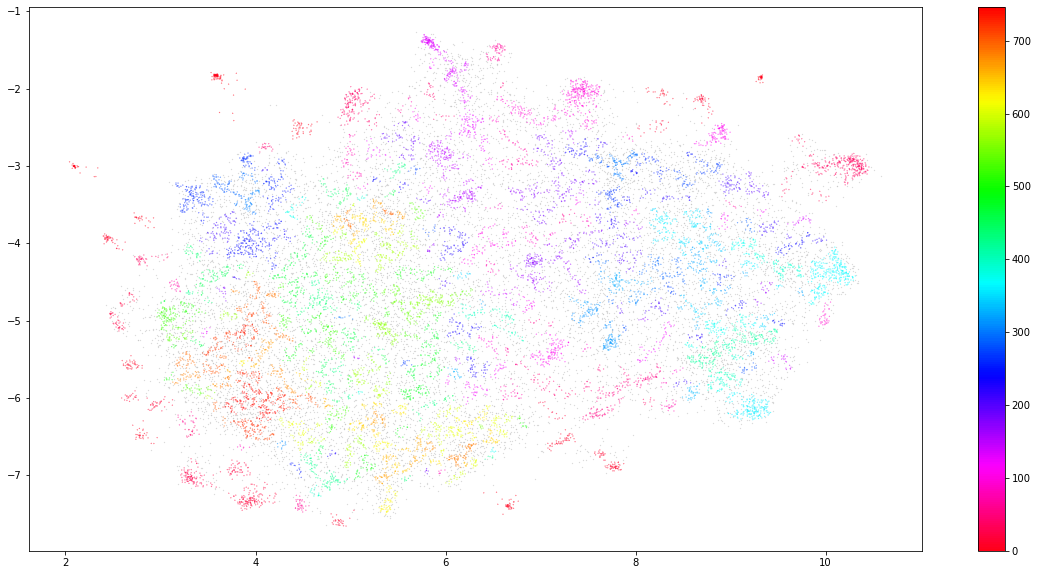

In [26]:
import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [27]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=\
                ['pasta', 'basil', 'olive oil', 'cheese', 'tomato', 'mushroom', 'milk'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_title = df['title'][doc_id]
    print(f"Document: {doc_id}, Score: {score}, Title: {doc_title}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 17647, Score: 0.2495768964290619, Title: Fettuccine with Pesto
-----------
Make pesto: In small sauce pan of boiling water, cook garlic cloves 2 minutes; drain.", "Transfer garlic to food processor and add basil, olive oil, pine nuts, and salt.", "Process until smooth.", "Remove sauce to bowl and stir in Parmesan cheese.", "Set pesto aside at room temperature.", "Bring large pot of salted water to a boil.", "Add pasta and cook according to package directs until al dente.", "Meanwhile, in medium saucepan of boiling salted water, cook potatoes 7 minutes, or until tender.", "Drain, reserving 3/4 cup cooking liquid.", "Transfer potatoes to large bowl.", "Drain pasta.", "Transfer to bowl with potatoes.", "Add pesto, reserved potato cooking liquid and cream, and toss well to combine thoroughly.
-----------

Document: 3459, Score: 0.2421516627073288, Title: Baked Pasta Shells With Tomato Sauce Recipe
-----------
* Use 1 bunch of fresh spinach, or possibly frzn spinach.", "Add in the

In [29]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=\
                ['cocoa', 'flour', 'sugar', 'egg', 'baking', 'soda'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_title = df['title'][doc_id]
    print(f"Document: {doc_id}, Score: {score}, Title: {doc_title}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 2218, Score: 0.22700151801109314, Title: Double Chocolate Nummies
-----------
Preheat oven to 350 degrees F (190 degrees C).", "Cream the together the butter or margarine, white sugar, vanilla, egg and water. Stir in the salt and the cocoa and beat well.", "Combine the flour and the baking soda. Stir the flour mixture into the creamed mixture. Mix in the chocolate chips and oatmeal. Drop tablespoon sized drops onto an ungreased cookie sheet.", "Bake at 350 degrees F (190 degrees C) for 12 to 14 minutes.
-----------

Document: 3042, Score: 0.2265167385339737, Title: Perfect Chocolate Cake Recipe
-----------
Preheat oven to 350 degrees F. Grease 2 - 9 inch layer cake pans.", "Whisk together chocolate, lowfat milk, allspice, brown sugar and one egg yolk in the top of a double boiler, stirring till a custard is formed and mix thickens.", "Cold.", "Stir in baking soda and salt.", "Sift the flour onto waxed paper.", "In bowl of electric mixer, whip the butter, gradually adding suga

In [36]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=\
                ['chuck roast','beef', 'potato', 'mushroom'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_title = df['title'][doc_id]
    print(f"Document: {doc_id}, Score: {score}, Title: {doc_title}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 5237, Score: 0.2847265899181366, Title: Potato Round Casserole
-----------
Brown and season ground beef and diced onion.", "Add mushroom soup and soy or Worcestershire sauce.", "Place in a greased 1-quart casserole dish.", "Place potato rounds on top of ground beef mixture.", "Bake 20 to 25 minutes in 375\u00b0 oven.", "Serves 4.
-----------

Document: 4132, Score: 0.2805428206920624, Title: Giant Stuffed Mushrooms
-----------
Preheat the oven to 400 degrees F (200 degrees C). Remove the mushroom stems from the caps, and set the stems aside. Place the caps gill-side up on a baking sheet. Drizzle them with 1 tablespoon of the olive oil, and season with salt and pepper. Roast in the preheated oven for 25 minutes.", "Meanwhile, prepare the pilaf stuffing. Chop mushroom stems. Heat the remaining olive oil in a skillet over medium heat. Cook chopped mushroom stems and garlic in oil until soft. Stir in the cilantro, carrot, celery and kasha; cook 2 minutes more. Pour in water. Brin

In [39]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=\
                ['slim'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_title = df['title'][doc_id]
    print(f"Document: {doc_id}, Score: {score}, Title: {doc_title}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

ValueError: 'slim' has not been learned by the model so it cannot be searched.

In [44]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [45]:
model.topic_words_reduced

array([['prepared baking', 'baking', 'rimmed baking', 'baking dish',
        'baked', 'lined baking', 'baked pastry', 'baking sheet',
        'baked crust', 'baked pie', 'bake preheated', 'dough',
        'buttered casserole', 'pastry blender', 'bake',
        'miniature muffin', 'cookie sheet', 'ceramic baking',
        'baking tray', 'mini muffin', 'creamed mixture', 'bread machine',
        'waffle maker', 'lined muffin', 'mixing bowl', 'melt butter',
        'cream maker', 'pancake', 'cornbread', 'stick cooking',
        'floured board', 'standard muffin', 'blender food',
        'melted butter', 'crusty bread', 'dough sticky',
        'greased cookie', 'oven', 'casserole dish', 'floured bundt',
        'french bread', 'dough hook', 'greased floured', 'flour',
        'pastry', 'bake uncovered', 'dessert plate', 'pastry bag',
        'dessert', 'pan'],
       ['blender food', 'minced garlic', 'flavored cooking',
        'five spice', 'chili', 'stick cooking', 'caramelized onion',
 